<a href="https://colab.research.google.com/github/dennisferreira1/Curso_VisualizacaoDeDados-Python/blob/main/Curso_PythonParaVisualizacaoAnaliseDeDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

#**Visualização e Análise de Dados sobre Geração Distribuída de Energia no Brasil**

---  

### Visão Geral

>A Geração Distribuída consiste num tipo de geração elétrica que se diferencia da realizada pela geração centralizada por ocorrer em locais em que não seria instalada uma usina geradora convencional, ou seja, mais próximo ao centro de carga, com a opção de interagir com a rede na forma de compra ou venda. Com a entrada em vigor da Resolução Normativa ANEEL n° 482/2012 (REN 482/2012), o consumidor pode gerar sua própria energia elétrica a partir de fontes renováveis ou cogeração qualificada e inclusive fornecer o excedente para a rede de distribuição de sua localidade. Com a entrada em vigor da REN 687/2015, atualização da REN 482/2012, o segmento de geração distribuída ganha um
avanço positivo através das novas regras da resolução.  
A geração de energia distribuída ajuda a alcançar o objetivo 7 da Agenda 2030 para o Desenvolvimento Sustentável da ONU, mais especificamente a meta 7.3 desse objetivo que é: Até 2030, aumentar substancialmente a participação de energias renováveis na matriz energética global	

>Esse trabalho tem como objetivo mostrar o avanço da geração distribuída de energia no Brasil e no Rio Grande do Norte. Para isso, foram usados os dados disponibilzados pela Agência Nacional de Energia Elétricia - ANEEL no [portal brasileiro de dados abertos](https://dados.gov.br/dataset/geracao-distribuida-relacao-empreendimentos).


### Instalação e importação de bibliotecas utilizadas no trabalho



In [43]:
pip install missingno #instalando a biblioteca missingno

In [44]:
import re
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

### Importando dataset do google drive

In [45]:
# lendo o arquivo .json armazenado no google drive
df_geracao_distribuida_brasil= pd.read_json('/content/drive/My Drive/Colab Notebooks/datasets/EmpGeracaoDistribuida.json', encoding= 'ISO-8859-1')
# mostrando os dados do DataFrame
df_geracao_distribuida_brasil

,nomMunicipio,codEmpGeracaoDistribuida,nomPessoaTitular,ideEmpGeracaoDistribuida,mdaPotenciaInstaladaKW,ideDistribuidora,dthProcessamento,dscCombustivel,dscGrupoFornecimento,sigTipoUC,dscModalidadeConsumo,codNucleoGD,dscClasseFornecimento,sigUF,dscSituacaoUC,qtdUCResponsavel,datSituacao,datConexao,nomDistribuidora
0,Porto Alegre,GD.RS.000.056.189,JOAO EDUARDO DA SILVA FONTANA,1,2.6,4273,24/10/2020 00:00:00,Radiação solar,B1,UFV,Geração na Própria UC,56189,Residencial,RS,Completa,1,07/02/2019,15/10/2018,COMPANHIA ESTADUAL DE DISTRIBUIÇÃO DE ENERGIA ...
1,Porto Alegre,GD.RS.000.192.966,SANDRA DE LOURDES TROMBETTA SILVA,2,3.0,4273,24/10/2020 00:00:00,Radiação solar,B1,UFV,Geração na Própria UC,192966,Residencial,RS,Completa,1,02/03/2020,03/02/2020,COMPANHIA ESTADUAL DE DISTRIBUIÇÃO DE ENERGIA ...
2,Ibaté,GD.SP.000.119.226,CATEC EQUIPS IND COM PREST SERV AGROIND,3,5.0,343,24/10/2020 00:00:00,Radiação solar,B3,UFV,Geração na Própria UC,119226,Industrial,SP,Completa,1,10/10/2019,25/09/2019,COMPANHIA PAULISTA DE FORÇA E LUZ
3,Campinas,GD.SP.000.004.658,MARIO GOMES PORTO,4,3.0,343,24/10/2020 00:00:00,Radiação solar,B1,UFV,Geração na Própria UC,4658,Residencial,SP,Completa,1,15/12/2016,01/09/2015,COMPANHIA PAULISTA DE FORÇA E LUZ
4,Campinas,GD.SP.000.002.022,FERNANDA ELISE GOMES DO NASCIMENTO,5,5.0,343,24/10/2020 00:00:00,Radiação solar,B1,UFV,Geração na Própria UC,2022,Residencial,SP,Completa,1,07/11/2016,19/10/2016,COMPANHIA PAULISTA DE FORÇA E LUZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319486,Araguaína,GD.TO.000.172.479,IVALDO NUNES PEREIRA,319487,3.0,161,24/10/2020 00:00:00,Radiação solar,B1,UFV,Geração na Própria UC,172479,Residencial,TO,Completa,1,20/01/2020,18/12/2019,ENERGISA TOCANTINS DISTRIBUIDORA DE ENERGIA S.A.
319487,Sorriso,GD.MT.000.300.659,VANDERLEI ODAIR MAITO,319488,8.0,511,24/10/2020 00:00:00,Radiação solar,B1,UFV,Geração na Própria UC,300659,Residencial,MT,Completa,1,22/09/2020,06/06/2020,ENERGISA MATO GROSSO - DISTRIBUIDORA DE ENERGI...
319488,Lucas do Rio Verde,GD.MT.000.287.664,CLAUDIO GONCALVES,319489,3.4,511,24/10/2020 00:00:00,Radiação solar,B1,UFV,Geração na Própria UC,287664,Residencial,MT,Completa,1,02/09/2020,02/07/2020,ENERGISA MATO GROSSO - DISTRIBUIDORA DE ENERGI...
319489,Sinop,GD.MT.000.296.245,RODOLFO ISSA FILHO,319490,11.2,511,24/10/2020 00:00:00,Radiação solar,B3,UFV,Geração na Própria UC,296245,Industrial,MT,Completa,1,22/09/2020,17/08/2020,ENERGISA MATO GROSSO - DISTRIBUIDORA DE ENERGI...


In [46]:
df_geracao_distribuida_brasil.columns

Index(['nomMunicipio', 'codEmpGeracaoDistribuida', 'nomPessoaTitular',
       'ideEmpGeracaoDistribuida', 'mdaPotenciaInstaladaKW',
       'ideDistribuidora', 'dthProcessamento', 'dscCombustivel',
       'dscGrupoFornecimento', 'sigTipoUC', 'dscModalidadeConsumo',
       'codNucleoGD', 'dscClasseFornecimento', 'sigUF', 'dscSituacaoUC',
       'qtdUCResponsavel', 'datSituacao', 'datConexao', 'nomDistribuidora'],
      dtype='object')

In [47]:
# excluindo as colunas que não são importantes para a análise
df_geracao_distribuida_brasil=df_geracao_distribuida_brasil.drop(columns= ['codEmpGeracaoDistribuida', 'codNucleoGD', 'nomPessoaTitular', 'datSituacao', 'dscCombustivel', 'qtdUCResponsavel', 'dscSituacaoUC', 'dthProcessamento'])
df_geracao_distribuida_brasil

,nomMunicipio,ideEmpGeracaoDistribuida,mdaPotenciaInstaladaKW,ideDistribuidora,dscGrupoFornecimento,sigTipoUC,dscModalidadeConsumo,dscClasseFornecimento,sigUF,datConexao,nomDistribuidora
0,Porto Alegre,1,2.6,4273,B1,UFV,Geração na Própria UC,Residencial,RS,15/10/2018,COMPANHIA ESTADUAL DE DISTRIBUIÇÃO DE ENERGIA ...
1,Porto Alegre,2,3.0,4273,B1,UFV,Geração na Própria UC,Residencial,RS,03/02/2020,COMPANHIA ESTADUAL DE DISTRIBUIÇÃO DE ENERGIA ...
2,Ibaté,3,5.0,343,B3,UFV,Geração na Própria UC,Industrial,SP,25/09/2019,COMPANHIA PAULISTA DE FORÇA E LUZ
3,Campinas,4,3.0,343,B1,UFV,Geração na Própria UC,Residencial,SP,01/09/2015,COMPANHIA PAULISTA DE FORÇA E LUZ
4,Campinas,5,5.0,343,B1,UFV,Geração na Própria UC,Residencial,SP,19/10/2016,COMPANHIA PAULISTA DE FORÇA E LUZ
...,...,...,...,...,...,...,...,...,...,...,...
319486,Araguaína,319487,3.0,161,B1,UFV,Geração na Própria UC,Residencial,TO,18/12/2019,ENERGISA TOCANTINS DISTRIBUIDORA DE ENERGIA S.A.
319487,Sorriso,319488,8.0,511,B1,UFV,Geração na Própria UC,Residencial,MT,06/06/2020,ENERGISA MATO GROSSO - DISTRIBUIDORA DE ENERGI...
319488,Lucas do Rio Verde,319489,3.4,511,B1,UFV,Geração na Própria UC,Residencial,MT,02/07/2020,ENERGISA MATO GROSSO - DISTRIBUIDORA DE ENERGI...
319489,Sinop,319490,11.2,511,B3,UFV,Geração na Própria UC,Industrial,MT,17/08/2020,ENERGISA MATO GROSSO - DISTRIBUIDORA DE ENERGI...


### Limpeza dos dados

> Usando a biblioteca *'missingno'* verificou-se por meio dos gráficos apresentados abaixo que o dataset fornecido pela ANEEL contém todas as linhas e colunas preenchidas.

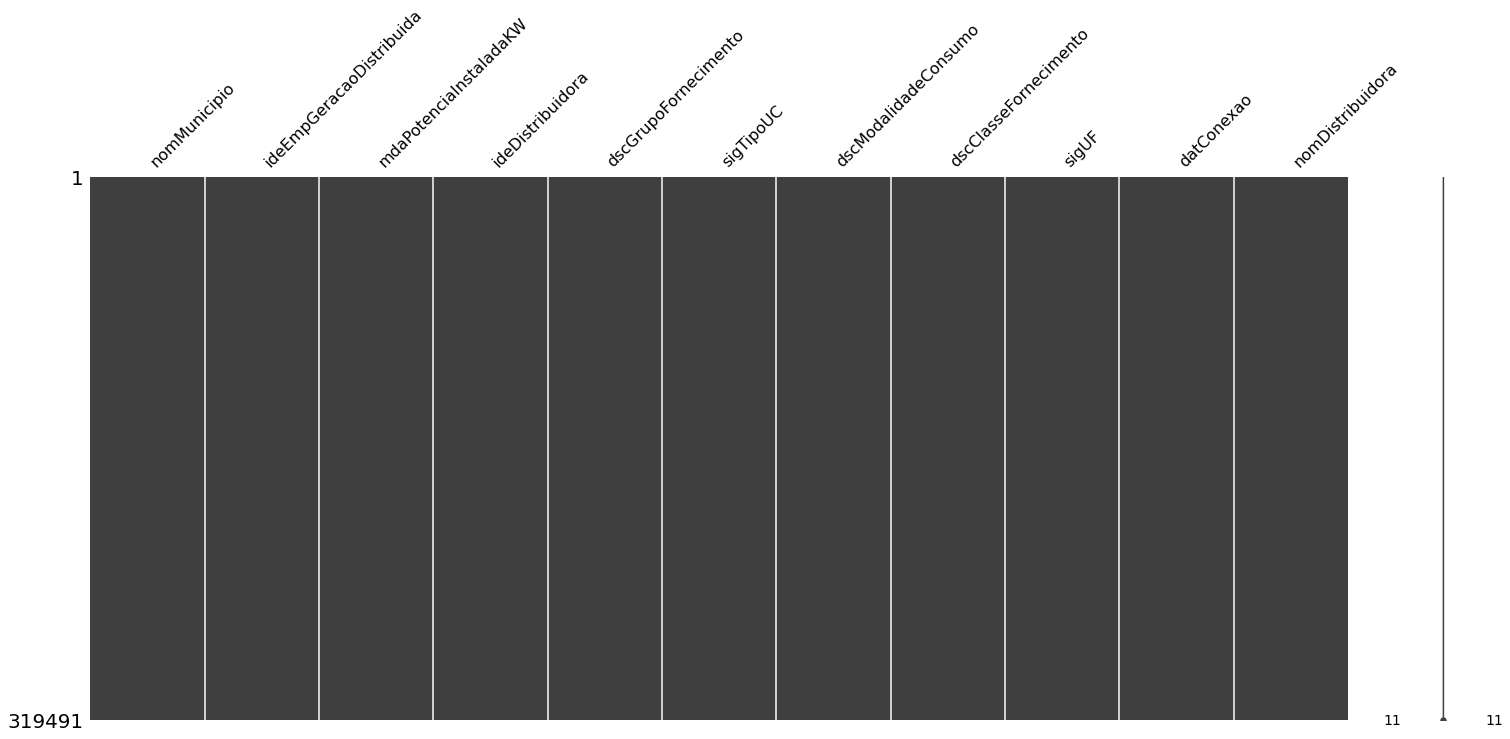

In [48]:
msno.matrix(df_geracao_distribuida_brasil) #leitura dos dados usando missingno na função matrix

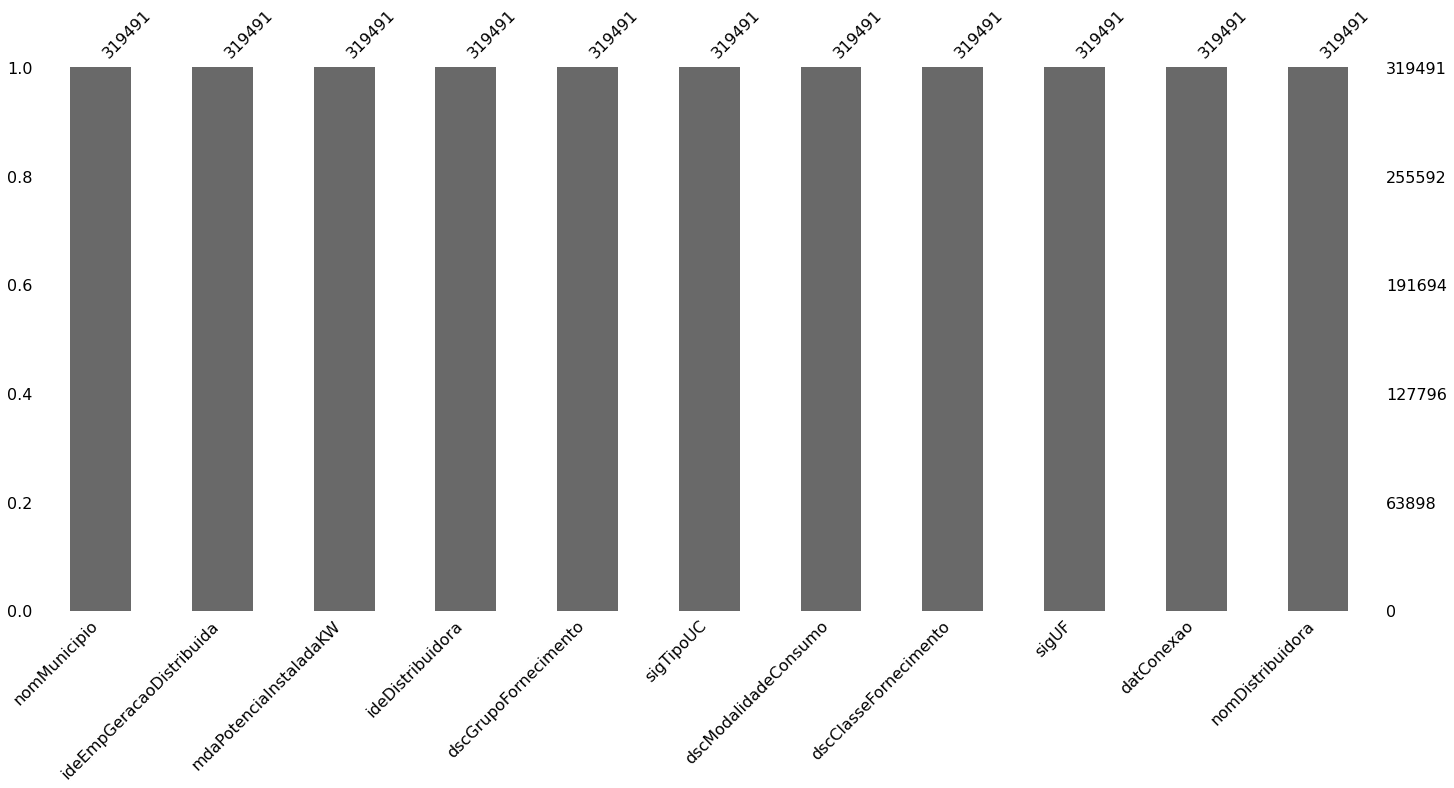

In [49]:
msno.bar(df_geracao_distribuida_brasil) #leitura dos dados usando missingno na função bar

### Visualizando e analisando os dados do DataFrame


**Dados do Brasil**




> Potência instalada no Brasil atualmente em gigawatts



In [50]:
# potência instalada no Brasil
potencia_instalada_brasil= df_geracao_distribuida_brasil['mdaPotenciaInstaladaKW'].sum()
potencia_instalada_brasil/(10**6) # potência em gigawatts

4.11345358

> Quantidades de empreendimentos instalados no Brasil atualmente.

In [51]:
# quantidades de empreendimentos instalados no Brasil
qtde_empreendimentos_brasil= df_geracao_distribuida_brasil['ideEmpGeracaoDistribuida'].count()
qtde_empreendimentos_brasil

319491

> Relação dos estados e suas potências (em kilowatts) instaladas atualmente.

In [52]:
# filtrando pelos estados e a potência instalada.
potencia_instalada_por_estados= df_geracao_distribuida_brasil.filter(['sigUF','mdaPotenciaInstaladaKW'])

# agrupando a soma total das potências instaladas por estados e ordenando de forma decrescente pela potência instalada
potencia_instalada_por_estados.groupby('sigUF').sum().sort_values(by='mdaPotenciaInstaladaKW', ascending=False)

,mdaPotenciaInstaladaKW
sigUF,
MG,829062.74
SP,497380.63
RS,489197.91
MT,323698.56
PR,288572.11
GO,226358.91
SC,207472.48
RJ,162588.43
CE,151725.04


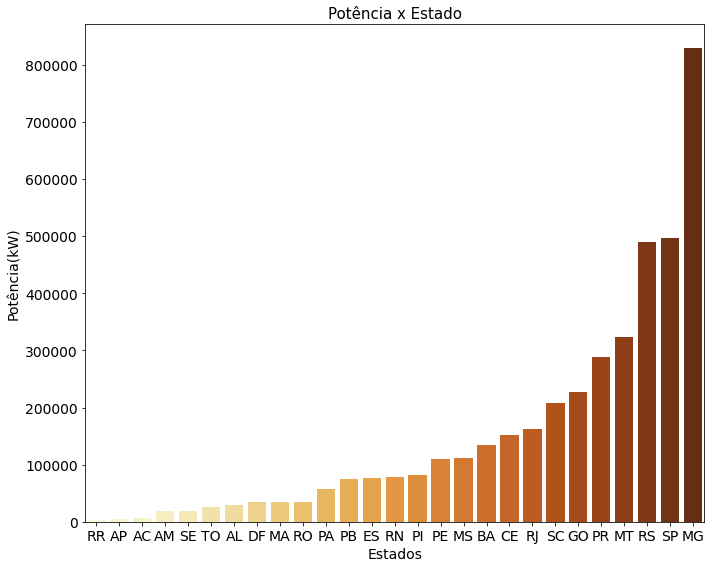

In [53]:
# Gráfico
soma_potencia_instalada_por_estados= potencia_instalada_por_estados.groupby('sigUF').sum().sort_values(by='mdaPotenciaInstaladaKW', ascending=True)
estados= [estado for estado in soma_potencia_instalada_por_estados['mdaPotenciaInstaladaKW'].keys()]
potencia_instalada= soma_potencia_instalada_por_estados['mdaPotenciaInstaladaKW']

#criando uma figure, axes
fig, ax = plt.subplots(figsize=(10,8))
#criando o gráfico de barras 
sns.barplot(x=estados, y=potencia_instalada, ax=ax, palette='YlOrBr')
#adicionando título
ax.set_title("Potência x Estado", fontdict={'fontsize':15})
#mudando nome e tamanho do label x
ax.set_xlabel('Estados', fontdict={'fontsize':14})
#mudando nome e tamanho do label y
ax.set_ylabel('Potência(kW)', fontdict={'fontsize':14})
#mudando tamanho dos labels dos ticks
ax.tick_params(labelsize=14)
#otimizar espaço da figure
fig.tight_layout();



> Relação dos estados e suas potências instaladas por ano.

In [54]:
# filtrando pelos datas de conexão, estados e potência instalada.
potencia_instalada_estados_por_ano= df_geracao_distribuida_brasil.filter(['datConexao', 'sigUF','mdaPotenciaInstaladaKW'])

# preenchendo os valores da coluna datConexao com apenas o ano da data completa
potencia_instalada_estados_por_ano['datConexao']= [int(re.findall('\d{2}/\d{2}/(\d{4})', data)[0]) for data in potencia_instalada_estados_por_ano['datConexao']]

# agrupando a soma total das potências instaladas por ano de instalação e estados e ordenando de forma decrescente pelo ano e pela potência instalada
potencia_instalada_estados_por_ano.groupby(['datConexao', 'sigUF']).sum().sort_values(by=['datConexao', 'mdaPotenciaInstaladaKW'], ascending=False)[:50] # mostrando as 50 primeiras linhas


mdaPotenciaInstaladaKW
datConexao sigUF                        
2020       MG                  361343.46
           SP                  245305.74
           RS                  212572.44
           MT                  145809.90
           GO                  125951.63
           CE                   72451.35
           BA                   70207.01
           SC                   67204.71
           RJ                   67140.88
           PE                   57243.29
           PR                   45702.76
           MS                   44140.65
           RN                   39196.15
           ES                   37529.32
           PI                   37369.45
           PB                   36062.15
           PA                   35912.26
           RO                   18419.48
           AL                   15889.32
           AM                   11612.74
           DF                   10544.82
           SE                    6561.64
           AC                    3839.46
           TO                    3152.70
           MA                    3039.03
           AP                    2495.27
           RR                    1513.03
2019       MG                  286206.62
           PR                  199199.51
           SP                  181416.31
           RS                  180070.92
           MT                  131293.33
           SC                   84042.61
           GO                   73841.25
           RJ                   60251.41
           MS                   51294.40
           BA                   49620.56
           CE                   39682.68
           PE                   33960.58
           PI                   31476.42
           ES                   28893.61
           PB                   28270.15
           RN                   24935.78
           MA                   23501.58
           TO                   16902.13
           PA                   15894.02
           DF                   13191.38
           RO                   10723.15
           AL                    9209.77
           SE                    8784.77

Text(0.5, 1.0, 'Potência x Anos x Estados')

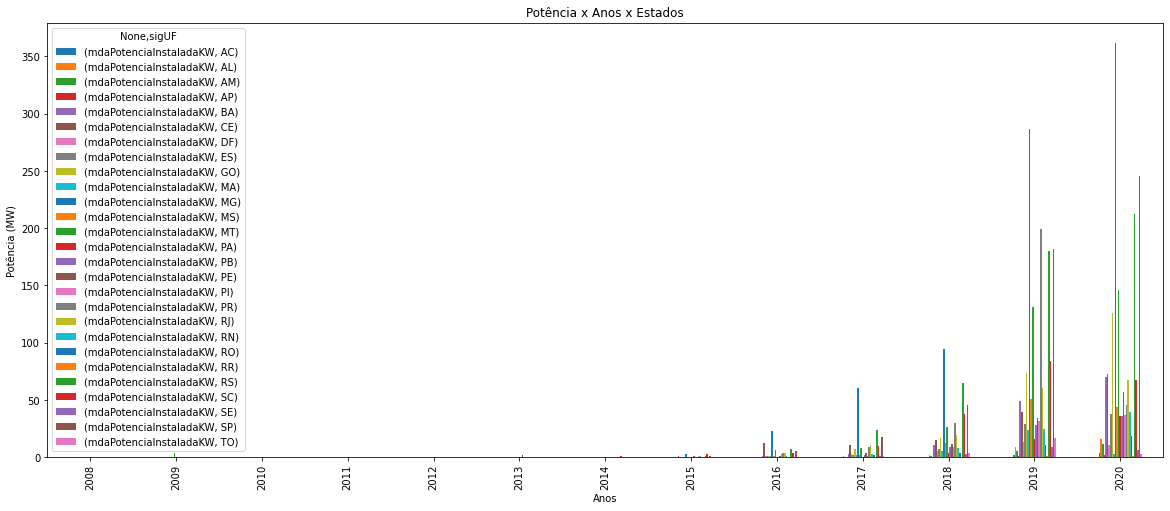

In [55]:
# gráfico
potencia_instalada_estados_por_ano_MW= potencia_instalada_estados_por_ano
potencia_instalada_estados_por_ano_MW['mdaPotenciaInstaladaKW']= [pot/1000 for pot in potencia_instalada_estados_por_ano_MW['mdaPotenciaInstaladaKW']]
ax= potencia_instalada_estados_por_ano_MW.groupby(['datConexao', 'sigUF']).sum()\
                                  .sort_values(by=['datConexao', 'mdaPotenciaInstaladaKW'], ascending=False)\
                                  .unstack().plot(figsize=(20,8), kind='bar')
ax.set_xlabel('Anos')
ax.set_ylabel('Potência (MW)')
ax.set_title('Potência x Anos x Estados')

> Relação das potências instaladas por ano no Brasil

In [56]:
# filtrando pelos datas de conexão e potência instalada.
potencia_instalada_por_ano= df_geracao_distribuida_brasil.filter(['datConexao','mdaPotenciaInstaladaKW'])

# preenchendo os valores da coluna datConexao com apenas o ano da data completa
potencia_instalada_por_ano['datConexao']= [int(re.findall('\d{2}/\d{2}/(\d{4})', data)[0]) for data in potencia_instalada_por_ano['datConexao']]

# agrupando a soma total das potências instaladas por ano de instalação e ordenando de forma decrescente pelo ano e pela potência instalada
potencia_instalada_por_ano.groupby('datConexao').sum()

,mdaPotenciaInstaladaKW
datConexao,
2008,25.00
2009,4023.19
2010,40.02
2011,132.00
2012,469.86
2013,2465.16
2014,3522.22
2015,14744.48
2016,80239.05


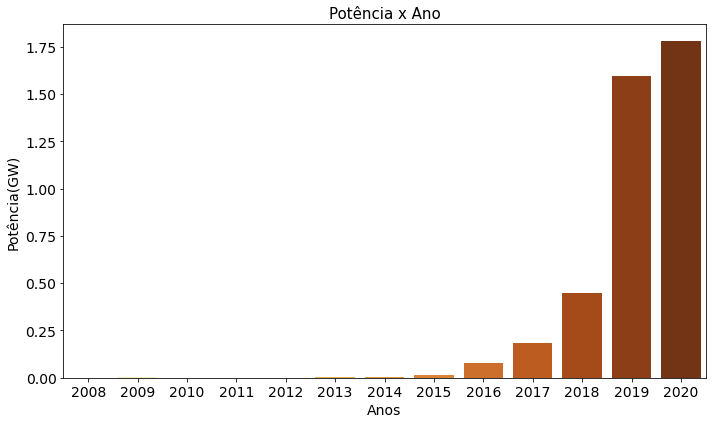

In [57]:
# Gráficos

soma_potencia_instalada_por_ano= potencia_instalada_por_ano.groupby('datConexao').sum()
anos= [ano for ano in soma_potencia_instalada_por_ano['mdaPotenciaInstaladaKW'].keys()]
potencia_instalada_ano= [pot/(10**6) for pot in soma_potencia_instalada_por_ano['mdaPotenciaInstaladaKW']] # potência instalada em GigaWatts

#criando uma figure, axes
fig1, ax1 = plt.subplots(figsize=(10,6))
#criando o gráfico de barras 
sns.barplot(x=anos, y=potencia_instalada_ano, ax=ax1, palette='YlOrBr')
#adicionando título
ax1.set_title("Potência x Ano", fontdict={'fontsize':15})
#mudando nome e tamanho do label x
ax1.set_xlabel('Anos', fontdict={'fontsize':14})
#mudando nome e tamanho do label y
ax1.set_ylabel('Potência(GW)', fontdict={'fontsize':14})
#mudando tamanho dos labels dos ticks
ax1.tick_params(labelsize=14)
#otimizar espaço da figure
fig1.tight_layout();

**Dados do RN**

> Criando da DataFrame do RN.

In [58]:
# selecionando pelo estado RN
df_geracao_distribuida_RN= df_geracao_distribuida_brasil[df_geracao_distribuida_brasil['sigUF'] == 'RN']
df_geracao_distribuida_RN.head(20) # mostrando as 20 primeiras linhas

,nomMunicipio,ideEmpGeracaoDistribuida,mdaPotenciaInstaladaKW,ideDistribuidora,dscGrupoFornecimento,sigTipoUC,dscModalidadeConsumo,dscClasseFornecimento,sigUF,datConexao,nomDistribuidora
865,Tibau do Sul,866,2.12,231,B3,UFV,Geração na Própria UC,Comercial,RN,19/08/2016,COMPANHIA ENERGÉTICA DO RIO GRANDE DO NORTE CO...
867,Natal,868,67.60,231,B3,UFV,Geração na Própria UC,Comercial,RN,18/12/2018,COMPANHIA ENERGÉTICA DO RIO GRANDE DO NORTE CO...
869,Mossoró,870,5.67,231,B1,UFV,Geração na Própria UC,Residencial,RN,31/08/2017,COMPANHIA ENERGÉTICA DO RIO GRANDE DO NORTE CO...
932,Natal,933,10.00,231,B3,UFV,Geração na Própria UC,Comercial,RN,19/11/2018,COMPANHIA ENERGÉTICA DO RIO GRANDE DO NORTE CO...
933,Natal,934,5.00,231,B1,UFV,Geração na Própria UC,Residencial,RN,10/09/2019,COMPANHIA ENERGÉTICA DO RIO GRANDE DO NORTE CO...
935,Parnamirim,936,5.00,231,B1,UFV,Geração na Própria UC,Residencial,RN,20/12/2018,COMPANHIA ENERGÉTICA DO RIO GRANDE DO NORTE CO...
940,Natal,941,20.00,231,B1,UFV,Geração na Própria UC,Comercial,RN,03/12/2018,COMPANHIA ENERGÉTICA DO RIO GRANDE DO NORTE CO...
943,Caicó,944,10.00,231,B1,UFV,Geração na Própria UC,Residencial,RN,27/09/2019,COMPANHIA ENERGÉTICA DO RIO GRANDE DO NORTE CO...
950,Lagoa de Velhos,951,7.50,231,B3,UFV,Geração na Própria UC,Comercial,RN,20/12/2019,COMPANHIA ENERGÉTICA DO RIO GRANDE DO NORTE CO...
952,Caicó,953,7.37,231,B1,UFV,Geração na Própria UC,Residencial,RN,06/09/2019,COMPANHIA ENERGÉTICA DO RIO GRANDE DO NORTE CO...


> Quantidade de municípios do RN com empreendimentos instalados.

In [59]:
coluna_municipio= df_geracao_distribuida_RN['nomMunicipio']
coluna_municipio.value_counts().size

148

> Relação dos municípios do RN e suas quantidades de empreendimentos instalados.

In [60]:
# contando as quantidades de empreendimentos por município
coluna_municipio.value_counts()

Natal                      1281
Mossoró                    1051
Parnamirim                  810
Caicó                       247
Pau dos Ferros              105
                           ... 
São Rafael                    1
Várzea                        1
Caiçara do Rio do Vento       1
Riacho de Santana             1
Jardim de Angicos             1
Name: nomMunicipio, Length: 148, dtype: int64

> Relação das potências instaladas no RN por ano.

In [61]:
# filtrando pelos datas de conexão e potência instalada.
potencia_instalada_RN_por_ano= df_geracao_distribuida_RN.filter(['datConexao', 'mdaPotenciaInstaladaKW'])

# preenchendo os valores da coluna datConexao com apenas o ano da data completa
potencia_instalada_RN_por_ano['datConexao']= [int(re.findall('\d{2}/\d{2}/(\d{4})', data)[0]) for data in potencia_instalada_RN_por_ano['datConexao']]

# agrupando a soma total das potências instaladas por ano de instalação ordenando de forma crescente pelo ano.
potencia_instalada_RN_por_ano.groupby('datConexao').sum()

,mdaPotenciaInstaladaKW
datConexao,
2013,56.40
2014,254.50
2015,854.35
2016,1285.24
2017,3087.01
2018,8234.33
2019,24935.78
2020,39196.15


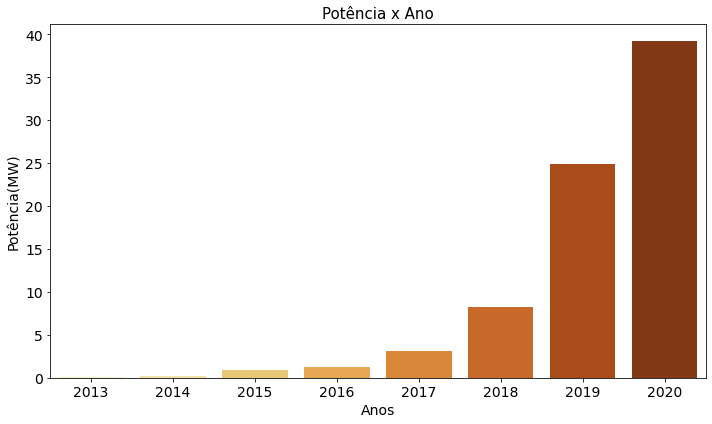

In [62]:
# Gráficos

soma_potencia_instalada_RN_por_ano= potencia_instalada_RN_por_ano.groupby('datConexao').sum()
anos= [ano for ano in soma_potencia_instalada_RN_por_ano['mdaPotenciaInstaladaKW'].keys()]
potencia_instalada_ano= [pot/(10**3) for pot in soma_potencia_instalada_RN_por_ano['mdaPotenciaInstaladaKW']] # potência instalada em MegaWatts

#criando uma figure, axes
fig2, ax2 = plt.subplots(figsize=(10,6))
#criando o gráfico de barras 
sns.barplot(x=anos, y=potencia_instalada_ano, ax=ax2, palette='YlOrBr')
#adicionando título
ax2.set_title("Potência x Ano", fontdict={'fontsize':15})
#mudando nome e tamanho do label x
ax2.set_xlabel('Anos', fontdict={'fontsize':14})
#mudando nome e tamanho do label y
ax2.set_ylabel('Potência(MW)', fontdict={'fontsize':14})
#mudando tamanho dos labels dos ticks
ax2.tick_params(labelsize=14)
#otimizar espaço da figure
fig2.tight_layout();

> Relação dos empreendimentos instalados no RN por ano.

In [63]:
# filtrando pelos datas de conexão e id do empreendimento.
empreendimentos_RN_por_ano= df_geracao_distribuida_RN.filter(['datConexao', 'ideEmpGeracaoDistribuida'])

# preenchendo os valores da coluna 'datConexao' com apenas o ano da data completa
empreendimentos_RN_por_ano['datConexao']= [int(re.findall('\d{2}/\d{2}/(\d{4})', data)[0]) for data in empreendimentos_RN_por_ano['datConexao']]

# agrupando a soma total dos empreendimentos instalados por ano ordenando de forma crescente pelo ano.
empreendimentos_RN_por_ano.groupby('datConexao').count().head(50) # mostrando as 50 primeiras linhas

,ideEmpGeracaoDistribuida
datConexao,
2013,4
2014,15
2015,67
2016,99
2017,185
2018,533
2019,1683
2020,2597


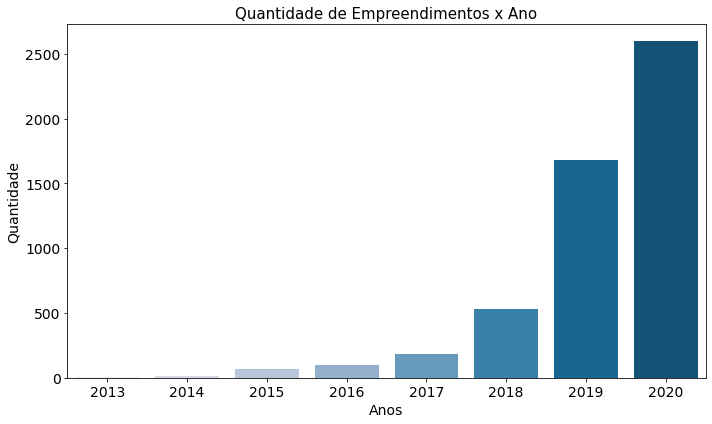

In [64]:
# Gráficos

soma_empreendimentos_instalados_RN_por_ano= empreendimentos_RN_por_ano.groupby('datConexao').count()
anos= [ano for ano in soma_empreendimentos_instalados_RN_por_ano['ideEmpGeracaoDistribuida'].keys()]
empreendimentos_instalados= soma_empreendimentos_instalados_RN_por_ano['ideEmpGeracaoDistribuida']

#criando uma figure, axes
fig3, ax3 = plt.subplots(figsize=(10,6))
#criando o gráfico de barras 
sns.barplot(x=anos, y=empreendimentos_instalados, ax=ax3, palette='PuBu')
#adicionando título
ax3.set_title("Quantidade de Empreendimentos x Ano", fontdict={'fontsize':15})
#mudando nome e tamanho do label x
ax3.set_xlabel('Anos', fontdict={'fontsize':14})
#mudando nome e tamanho do label y
ax3.set_ylabel('Quantidade', fontdict={'fontsize':14})
#mudando tamanho dos labels dos ticks
ax3.tick_params(labelsize=14)
#otimizar espaço da figure
fig3.tight_layout();

### Conclusão

> Com base nos resultados verificou-se um grande aumento tanto no Brasil como no RN após a entrada em vigor da REN 687/2015, principalmente nos últimos dois anos. Isso mostra que o Brasil vem adotando medidas para contribuir com o objetivo 7 da Agenda 2030 para o Desenvolvimento Sustentável da ONU.

### Referências

> http://www.agenda2030.org.br/  
> https://dados.gov.br/organization/agencia-nacional-de-energia-eletrica  
> https://www.aneel.gov.br/  
> https://pandas.pydata.org/  
> https://matplotlib.org/  
> https://seaborn.pydata.org/  
> https://www.kaggle.com/dennisferreira/empreendimentos-de-geracao-distribuida-de-energia